<a href="https://colab.research.google.com/github/Adigozalovh/DeepLearning/blob/main/Introduction_to_Deep_Learning_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
A = torch.tensor([
    [1.0, 4.0, 7.0],
    [2.0, 3.0, 6.0]
])

In [3]:
A

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [4]:
X = torch.tensor([
    [1.0, 4.0, 7.0],
    [2.0, 3.0, 6.0]
], dtype=torch.bfloat16)

In [5]:
X

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.bfloat16)

In [6]:
X.shape

torch.Size([2, 3])

In [7]:
X.dtype

torch.bfloat16

In [8]:
X[0, 1]

tensor(4., dtype=torch.bfloat16)

In [9]:
X[:, 1]

tensor([4., 3.], dtype=torch.bfloat16)

In [10]:
X.abs()

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.bfloat16)

In [11]:
torch.abs(X)

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.bfloat16)

In [12]:
# torch.cos(), torch.exp(), torch.max(), torch.mean(), torch.sqrt()

In [13]:
X.sqrt()

tensor([[1.0000, 2.0000, 2.6406],
        [1.4141, 1.7344, 2.4531]], dtype=torch.bfloat16)

In [14]:
10 * (X + 1.0)

tensor([[20., 50., 80.],
        [30., 40., 70.]], dtype=torch.bfloat16)

In [15]:
X.exp()

tensor([[   2.7188,   54.5000, 1096.0000],
        [   7.3750,   20.1250,  404.0000]], dtype=torch.bfloat16)

In [16]:
X.mean()

tensor(3.8281, dtype=torch.bfloat16)

In [17]:
X.max(dim=0) #, keepdim=True

torch.return_types.max(
values=tensor([2., 4., 7.], dtype=torch.bfloat16),
indices=tensor([1, 0, 0]))

In [18]:
X

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.bfloat16)

In [19]:
X @ X.T

tensor([[66., 56.],
        [56., 49.]], dtype=torch.bfloat16)

In [20]:
import numpy as np

In [21]:
A.numpy()

array([[1., 4., 7.],
       [2., 3., 6.]], dtype=float32)

In [22]:
torch.tensor(np.array([[1., 4., 7.], [2., 3., 6.]]))

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.float64)

In [23]:
# It's generally better to use 32 bits in deep learning because this takes half the RAM and speeds up computations,
# and neural nets do not actually need the extra precision offered by 64-bit floats.

In [24]:
N = torch.FloatTensor(np.array([[1., 4., 7.], [2., 3., 6.]])) #automatically converts the array to 32 bits

N

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [25]:
N.dtype

torch.float32

In [26]:
X[:, 1] = -99
X

tensor([[  1., -99.,   7.],
        [  2., -99.,   6.]], dtype=torch.bfloat16)

In [27]:
X.relu()

tensor([[1., 0., 7.],
        [2., 0., 6.]], dtype=torch.bfloat16)

In [28]:
X

tensor([[  1., -99.,   7.],
        [  2., -99.,   6.]], dtype=torch.bfloat16)

In [29]:
X.relu_()

tensor([[1., 0., 7.],
        [2., 0., 6.]], dtype=torch.bfloat16)

In [30]:
X   #changed in place

tensor([[1., 0., 7.],
        [2., 0., 6.]], dtype=torch.bfloat16)

In [31]:
if torch.cuda.is_available():
  device = "cuda"
elif torch.backends.mps.is_available():
  device = "mps"
else:
  device = "cpu"

In [32]:
device

'cuda'

In [33]:
!nvidia-smi   # watch -n 1 nvidia-smi

Thu Feb 12 15:17:58 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.82.07              Driver Version: 580.82.07      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8             10W /   70W |       3MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [34]:
M = torch.tensor([
    [1., 2., 3.],
    [4., 5., 6.]
])
M = M.to(device)

In [35]:
M

tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')

In [36]:
M.device

device(type='cuda', index=0)

In [37]:
M = torch.tensor([[1., 2., 3.], [4., 5., 6.]], device=device)

In [38]:
R = M @ M.T

In [39]:
R

tensor([[14., 32.],
        [32., 77.]], device='cuda:0')

In [40]:
M = torch.rand((1000, 1000)) # on the CPU
%timeit M @ M.T

M = torch.rand((1000, 1000), device="cuda") # on the GPU
%timeit M @ M.T

31.3 ms ± 4.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
560 µs ± 2.71 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [41]:
x = torch.tensor(5.0, requires_grad=True)
f = x ** 2
f

tensor(25., grad_fn=<PowBackward0>)

In [42]:
f.backward()
x.grad

tensor(10.)

In [43]:
learning_rate = 0.1
with torch.no_grad():
  x-= learning_rate * x.grad   # gradient descent step

In [44]:
x

tensor(4., requires_grad=True)

In [45]:
x_detached = x.detach()
x_detached -= learning_rate * x.grad  # detach yaddasda eyni yerdedi

In [46]:
x_detached

tensor(3.)

In [47]:
x.grad.zero_()

tensor(0.)

In [48]:
learning_rate = 0.1
X = torch.tensor(5.0, requires_grad=True)
for iteration in range(100):
  f = x ** 2    # forward pass
  f.backward()   # backward pass
  with torch.no_grad():
    x-= learning_rate * x.grad #gradient descent step
  print(x)
  x.grad.zero_()

tensor(2.4000, requires_grad=True)
tensor(1.9200, requires_grad=True)
tensor(1.5360, requires_grad=True)
tensor(1.2288, requires_grad=True)
tensor(0.9830, requires_grad=True)
tensor(0.7864, requires_grad=True)
tensor(0.6291, requires_grad=True)
tensor(0.5033, requires_grad=True)
tensor(0.4027, requires_grad=True)
tensor(0.3221, requires_grad=True)
tensor(0.2577, requires_grad=True)
tensor(0.2062, requires_grad=True)
tensor(0.1649, requires_grad=True)
tensor(0.1319, requires_grad=True)
tensor(0.1056, requires_grad=True)
tensor(0.0844, requires_grad=True)
tensor(0.0676, requires_grad=True)
tensor(0.0540, requires_grad=True)
tensor(0.0432, requires_grad=True)
tensor(0.0346, requires_grad=True)
tensor(0.0277, requires_grad=True)
tensor(0.0221, requires_grad=True)
tensor(0.0177, requires_grad=True)
tensor(0.0142, requires_grad=True)
tensor(0.0113, requires_grad=True)
tensor(0.0091, requires_grad=True)
tensor(0.0073, requires_grad=True)
tensor(0.0058, requires_grad=True)
tensor(0.0046, requi

In [49]:
t = torch.tensor(2.0, requires_grad=True)
z = t.exp() # this is an intermediate result
z += 1 # this is an inplace operation
z.backward() # RuntimeError !

RuntimeError: one of the variables needed for gradient computation has been modified by an inplace operation: [torch.FloatTensor []], which is output 0 of ExpBackward0, is at version 1; expected version 0 instead. Hint: enable anomaly detection to find the operation that failed to compute its gradient, with torch.autograd.set_detect_anomaly(True).

In [50]:
# but

t = torch.tensor(2.0, requires_grad=True)
z = t.exp()   # this is and intermediate result
z = z + 1   # new tensor created, and previous saved for computation graph
z.backward()

# make sure you don't modify in place a tensor needed for backprop

In [51]:
import sklearn

In [52]:
X, y = sklearn.datasets.fetch_california_housing(return_X_y=True)

In [53]:
X_train_full, X_test, y_train_full, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

In [54]:
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X_train_full, y_train_full, test_size=0.2)

In [55]:
X_train.shape, X_valid.shape, X_test.shape

((13209, 8), (3303, 8), (4128, 8))

In [56]:
X_train = torch.FloatTensor(X_train)
X_valid = torch.FloatTensor(X_valid)
X_test = torch.FloatTensor(X_test)
means = X_train.mean(dim=0, keepdims=True)
stds = X_train.std(dim=0, keepdims=True)
X_train = (X_train - means) / stds
X_valid = (X_valid - means) /stds
X_test = (X_test - means) / stds

In [57]:
y_train = torch.FloatTensor(y_train).reshape(-1, 1)
y_valid = torch.FloatTensor(y_valid).reshape(-1, 1)
y_test = torch.FloatTensor(y_test).reshape(-1, 1)

In [58]:
torch.manual_seed(42)
n_features = X_train.shape[1]
w = torch.randn((n_features, 1), requires_grad=True)
b = torch.tensor(0., requires_grad=True)

In [59]:
learning_rate = 0.4
n_epochs = 20
for epoch in range(n_epochs):
  y_pred = X_train @ w + b
  loss = ((y_pred - y_train) ** 2).mean()
  loss.backward()
  with torch.no_grad():
    b -= learning_rate * b.grad
    w -= learning_rate * w.grad
    b.grad.zero_()
    w.grad.zero_()
  print(f'Epoch {epoch+1}/{n_epochs}, Loss: {loss.item()}')

Epoch 1/20, Loss: 16.0909423828125
Epoch 2/20, Loss: 4.745306015014648
Epoch 3/20, Loss: 2.151334524154663
Epoch 4/20, Loss: 1.2629581689834595
Epoch 5/20, Loss: 0.9259057641029358
Epoch 6/20, Loss: 0.787167489528656
Epoch 7/20, Loss: 0.72263503074646
Epoch 8/20, Loss: 0.6870623230934143
Epoch 9/20, Loss: 0.6635947823524475
Epoch 10/20, Loss: 0.645805299282074
Epoch 11/20, Loss: 0.6311528086662292
Epoch 12/20, Loss: 0.6185649037361145
Epoch 13/20, Loss: 0.6075354218482971
Epoch 14/20, Loss: 0.5977836847305298
Epoch 15/20, Loss: 0.5891247987747192
Epoch 16/20, Loss: 0.5814195871353149
Epoch 17/20, Loss: 0.574553906917572
Epoch 18/20, Loss: 0.5684305429458618
Epoch 19/20, Loss: 0.5629650950431824
Epoch 20/20, Loss: 0.5580833554267883


In [60]:
X_new = X_test[:3]
with torch.no_grad():
  y_pred = X_new @ w + b

y_pred

tensor([[0.9863],
        [2.0252],
        [2.2579]])

In [61]:
y_test[:3]

tensor([[1.3880],
        [2.1020],
        [3.5000]])

In [62]:
import torch.nn as nn

In [63]:
torch.manual_seed(42)
model = nn.Linear(in_features = n_features, out_features=1)

In [64]:
model.bias

Parameter containing:
tensor([0.3117], requires_grad=True)

In [65]:
model.weight

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)

In [66]:
model.parameters()

<generator object Module.parameters at 0x7dcd18fe34c0>

In [67]:
next(model.parameters())

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)

In [68]:
for param in model.parameters():
  print(param)

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)
Parameter containing:
tensor([0.3117], requires_grad=True)


In [69]:
for name, param in model.named_parameters():
  print(f'{name} | {param}')

weight | Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)
bias | Parameter containing:
tensor([0.3117], requires_grad=True)


In [70]:
model(X_train[:2])

tensor([[0.6628],
        [0.6918]], grad_fn=<AddmmBackward0>)

In [71]:
y_train[:2]

tensor([[2.4480],
        [5.0000]])

In [72]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
mse = nn.MSELoss()

In [73]:
model(X_train[:2])

tensor([[0.6628],
        [0.6918]], grad_fn=<AddmmBackward0>)

In [74]:
def train_bgd(model, optimizer, criterion, X_train, y_train, n_epochs):
  for epoch in range(n_epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    print(f'Epoch {epoch+1}/{n_epochs}, Loss: {loss.item()}')

In [75]:
train_bgd(model, optimizer, mse, X_train, y_train, n_epochs)

Epoch 1/20, Loss: 4.303203582763672
Epoch 2/20, Loss: 0.7668125629425049
Epoch 3/20, Loss: 0.6133383512496948
Epoch 4/20, Loss: 0.5946548581123352
Epoch 5/20, Loss: 0.5845420956611633
Epoch 6/20, Loss: 0.576421856880188
Epoch 7/20, Loss: 0.5694555044174194
Epoch 8/20, Loss: 0.5633587837219238
Epoch 9/20, Loss: 0.5579817891120911
Epoch 10/20, Loss: 0.5532238483428955
Epoch 11/20, Loss: 0.5490067601203918
Epoch 12/20, Loss: 0.5452653169631958
Epoch 13/20, Loss: 0.5419436097145081
Epoch 14/20, Loss: 0.5389927625656128
Epoch 15/20, Loss: 0.5363697409629822
Epoch 16/20, Loss: 0.5340368151664734
Epoch 17/20, Loss: 0.5319607257843018
Epoch 18/20, Loss: 0.5301120281219482
Epoch 19/20, Loss: 0.5284647941589355
Epoch 20/20, Loss: 0.5269961953163147


In [76]:
X_new = X_test[:3]

with torch.no_grad():
  y_pred = model(X_new)

y_pred

tensor([[0.8120],
        [2.0184],
        [2.3431]])

In [77]:
y_test[:3]

tensor([[1.3880],
        [2.1020],
        [3.5000]])

In [78]:
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(n_features, 50),
    nn.ReLU(),
    nn.Linear(50, 40),
    nn.ReLU(),
    nn.Linear(40, 1)
)

In [79]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()
train_bgd(model, optimizer, mse, X_train, y_train, n_epochs)

Epoch 1/20, Loss: 5.021209716796875
Epoch 2/20, Loss: 2.0776679515838623
Epoch 3/20, Loss: 1.02065110206604
Epoch 4/20, Loss: 0.8733789920806885
Epoch 5/20, Loss: 0.7894479632377625
Epoch 6/20, Loss: 0.7375231385231018
Epoch 7/20, Loss: 0.7044003009796143
Epoch 8/20, Loss: 0.682380735874176
Epoch 9/20, Loss: 0.6669236421585083
Epoch 10/20, Loss: 0.6553595662117004
Epoch 11/20, Loss: 0.6460980176925659
Epoch 12/20, Loss: 0.6381794810295105
Epoch 13/20, Loss: 0.6310997009277344
Epoch 14/20, Loss: 0.6245662569999695
Epoch 15/20, Loss: 0.6184311509132385
Epoch 16/20, Loss: 0.612614095211029
Epoch 17/20, Loss: 0.6070522665977478
Epoch 18/20, Loss: 0.6016919612884521
Epoch 19/20, Loss: 0.5965196490287781
Epoch 20/20, Loss: 0.5915190577507019


#Making it MiniBatches

In [80]:
from torch.utils.data import TensorDataset, DataLoader

In [81]:
train_dataset = TensorDataset(X_train, y_train)

In [82]:
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True)

In [83]:
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(in_features = n_features, out_features = 64),
    nn.ReLU(),
    nn.Linear(in_features = 64, out_features = 32),
    nn.ReLU(),
    nn.Linear(in_features = 32, out_features = 1)
)

model.to(device)

Sequential(
  (0): Linear(in_features=8, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=1, bias=True)
)

###data loader batchler yaratmagimiza komek edir, trainingi suretlendirir

In [84]:
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
mse = nn.MSELoss()

In [85]:
def train(model, optimizer, criterion, train_loader, n_epochs):
  model.train()
  for epoch in range(n_epochs):
    total_loss = 0.
    for X_batch, y_batch in train_loader:
      X_batch , y_batch = X_batch.to(device), y_batch.to(device)
      y_pred = model(X_batch)
      loss = criterion(y_pred, y_batch)
      total_loss += loss.item()
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    mean_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{n_epochs}, Loss:{mean_loss:.4f}')

In [86]:
train(model, optimizer, mse, train_loader, n_epochs)

Epoch 1/20, Loss:0.7036
Epoch 2/20, Loss:0.4170
Epoch 3/20, Loss:0.3946
Epoch 4/20, Loss:0.3799
Epoch 5/20, Loss:0.3639
Epoch 6/20, Loss:0.3582
Epoch 7/20, Loss:0.3528
Epoch 8/20, Loss:0.3448
Epoch 9/20, Loss:0.3415
Epoch 10/20, Loss:0.3361
Epoch 11/20, Loss:0.3335
Epoch 12/20, Loss:0.3269
Epoch 13/20, Loss:0.3243
Epoch 14/20, Loss:0.3168
Epoch 15/20, Loss:0.3174
Epoch 16/20, Loss:0.3154
Epoch 17/20, Loss:0.3101
Epoch 18/20, Loss:0.3078
Epoch 19/20, Loss:0.3066
Epoch 20/20, Loss:0.3053


In [87]:
def evaluate(model, data_loader, metric_fn, aggregate_fn = torch.mean):
  model.eval()
  metrics=[]
  with torch.no_grad():
    for X_batch, y_batch in data_loader:
      X_batch, y_batch = X_batch.to(device), y_batch.to(device)
      y_pred = model(X_batch)
      metric = metric_fn(y_pred, y_batch)
      metrics.append(metric)
    return aggregate_fn(torch.stack(metrics))

In [88]:
valid_dataset = TensorDataset(X_valid, y_valid)
valid_loader = DataLoader(valid_dataset, batch_size = 32)
valid_mse = evaluate(model, valid_loader, mse)
valid_mse

tensor(0.2861, device='cuda:0')

In [89]:
def rmse(y_pred, y_true):
  return ((y_pred - y_true) ** 2).mean().sqrt()

In [90]:
evaluate(model, valid_loader, mse)

tensor(0.2861, device='cuda:0')

In [91]:
0.3055 ** 0.5 != 0.5497

True

The reason is that instead of calculating the RMSE over the whole validation set, we computed it over each batch and then computed the mean of all these batch RMSEs

In [92]:
evaluate(model, valid_loader, mse,
         aggregate_fn=lambda metrics: torch.sqrt(torch.mean(metrics)))

tensor(0.5349, device='cuda:0')

In [93]:
0.3055 ** 0.5

0.5527205442174191

In [94]:
%pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 31.7 MB/s eta 0:00:00


In [95]:
import torchmetrics

In [96]:
def evaluate_tm(model, data_loader, metric):
  model.eval()
  metric.reset()
  with torch.no_grad():
    for X_batch, y_batch in data_loader:
      X_batch, y_batch = X_batch.to(device), y_batch.to(device)
      y_pred = model(X_batch)
      metric.update(y_pred, y_batch)
  return metric.compute()

In [97]:
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
evaluate_tm(model, valid_loader, rmse)

tensor(0.5360, device='cuda:0')

### Deep and Wide Networs

In [98]:
class WideAndDeep(nn.Module):
  def __init__(self, n_features):
    super().__init__()
    self.deep_stack = nn.Sequential(
        nn.Linear(n_features, 50),
        nn.ReLU(),
        nn.Linear(50, 40),
        nn.ReLU()
    )
    self.output_layer = nn.Linear(40 + n_features, 1)

  def forward(self, X):
    deep_output = self.deep_stack(X)
    wide_and_deep = torch.concat([X, deep_output], dim=1)
    return self.output_layer(wide_and_deep)

In [99]:
[i for i in WideAndDeep(8).children()]

[Sequential(
   (0): Linear(in_features=8, out_features=50, bias=True)
   (1): ReLU()
   (2): Linear(in_features=50, out_features=40, bias=True)
   (3): ReLU()
 ),
 Linear(in_features=48, out_features=1, bias=True)]

In [100]:
[i for i in WideAndDeep(8).named_children()]

[('deep_stack',
  Sequential(
    (0): Linear(in_features=8, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=40, bias=True)
    (3): ReLU()
  )),
 ('output_layer', Linear(in_features=48, out_features=1, bias=True))]

In [101]:
torch.manual_seed(42)
model = WideAndDeep(n_features).to(device)
learning_rate = 0.002
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)
mse = nn.MSELoss()
train(model, optimizer, mse, train_loader, n_epochs)

Epoch 1/20, Loss:1.3436
Epoch 2/20, Loss:0.6183
Epoch 3/20, Loss:0.5721
Epoch 4/20, Loss:0.5412
Epoch 5/20, Loss:0.5189
Epoch 6/20, Loss:0.5019
Epoch 7/20, Loss:0.4899
Epoch 8/20, Loss:0.4791
Epoch 9/20, Loss:0.4715
Epoch 10/20, Loss:0.4641
Epoch 11/20, Loss:0.4586
Epoch 12/20, Loss:0.4521
Epoch 13/20, Loss:0.4470
Epoch 14/20, Loss:0.4415
Epoch 15/20, Loss:0.4376
Epoch 16/20, Loss:0.4333
Epoch 17/20, Loss:0.4284
Epoch 18/20, Loss:0.4258
Epoch 19/20, Loss:0.4212
Epoch 20/20, Loss:0.4175


In [102]:
class WideAndDeepV2(nn.Module):
  def __init__(self, n_features):
    super().__init__()

    self.deep_stack = nn.Sequential(
        nn.Linear(n_features - 2,50), nn.ReLU(),
        nn.Linear(50,40), nn.ReLU()
    )
    self.output_layer = nn.Linear(40 + 5, 1)

  def forward(self, X):
    X_wide = X[:, :5]
    X_deep = X[:, 2:]

    deep_output = self.deep_stack(X_deep)
    wide_and_deep = torch.concat([X_wide, deep_output], dim=1)

    return self.output_layer(wide_and_deep)

In [103]:
torch.manual_seed(42)
model = WideAndDeepV2(n_features).to(device)
learning_rate = 0.002
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
mse = nn.MSELoss()
train(model, optimizer, mse, train_loader, n_epochs)

Epoch 1/20, Loss:1.3995
Epoch 2/20, Loss:0.6240
Epoch 3/20, Loss:0.5628
Epoch 4/20, Loss:0.5329
Epoch 5/20, Loss:0.5139
Epoch 6/20, Loss:0.5009
Epoch 7/20, Loss:0.4906
Epoch 8/20, Loss:0.4831
Epoch 9/20, Loss:0.4775
Epoch 10/20, Loss:0.4706
Epoch 11/20, Loss:0.4664
Epoch 12/20, Loss:0.4620
Epoch 13/20, Loss:0.4579
Epoch 14/20, Loss:0.4548
Epoch 15/20, Loss:0.4516
Epoch 16/20, Loss:0.4493
Epoch 17/20, Loss:0.4462
Epoch 18/20, Loss:0.4449
Epoch 19/20, Loss:0.4416
Epoch 20/20, Loss:0.4396


In [104]:
class WideAndDeepV3(nn.Module):
  def __init__(self, n_features):
    super().__init__()

    self.deep_stack = nn.Sequential(
        nn.Linear(n_features - 2, 50), nn.ReLU(),
        nn.Linear(50,40), nn.ReLU()
    )

    self.output_layer = nn.Linear(40 + 5, 1 )

  def forward(self, X_wide, X_deep):
    deep_output = self.deep_stack(X_deep)
    wide_and_deep = torch.concat([X_wide, deep_output], dim=1)

    return self.output_layer(wide_and_deep)

In [105]:
train_data_wd = TensorDataset(X_train[:, :5], X_train[:,2:], y_train)
train_loader_wd = DataLoader(train_data_wd, batch_size = 32, shuffle = True)
valid_data_wd = TensorDataset(X_valid[:, :5], X_valid[:, 2:], y_valid)
valid_loader_wd = DataLoader(valid_data_wd, batch_size=32, shuffle=True)
test_data_wd = TensorDataset(X_test[:, :5], X_test[:, 2:], y_test)
test_loader_wd = DataLoader(test_data_wd, batch_size=32, shuffle=True)

In [106]:
def train(model, optimizer, criterion, train_loader, n_epochs):
  for epoch in range(n_epochs):
    total_loss = 0.
    for X_batch_wide, X_batch_deep, y_batch in train_loader:
      X_batch_wide, X_batch_deep, y_batch = X_batch_wide.to(device), X_batch_deep.to(device), y_batch.to(device)
      y_pred = model(X_batch_wide, X_batch_deep)
      loss = criterion(y_pred, y_batch)
      total_loss = total_loss + loss
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    mean_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{n_epochs}, Loss:{mean_loss:.4f}')

In [107]:
torch.manual_seed(42)
model = WideAndDeepV3(n_features).to(device)
learning_rate = 0.002
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()
train(model, optimizer, mse, train_loader_wd, n_epochs)

Epoch 1/20, Loss:1.3995
Epoch 2/20, Loss:0.6240
Epoch 3/20, Loss:0.5628
Epoch 4/20, Loss:0.5329
Epoch 5/20, Loss:0.5139
Epoch 6/20, Loss:0.5009
Epoch 7/20, Loss:0.4906
Epoch 8/20, Loss:0.4831
Epoch 9/20, Loss:0.4775
Epoch 10/20, Loss:0.4706
Epoch 11/20, Loss:0.4664
Epoch 12/20, Loss:0.4620
Epoch 13/20, Loss:0.4579
Epoch 14/20, Loss:0.4548
Epoch 15/20, Loss:0.4516
Epoch 16/20, Loss:0.4493
Epoch 17/20, Loss:0.4462
Epoch 18/20, Loss:0.4449
Epoch 19/20, Loss:0.4416
Epoch 20/20, Loss:0.4396


In [108]:
class WideAndDeepDataset(torch.utils.data.Dataset):
  def __init__(self, X_wide, X_deep, y):
    self.X_wide = X_wide
    self.X_deep = X_deep
    self.y = y

  def __len__(self):
    return len(self.y)

  def __getitem__(self, idx):
    input_dict = {"X_wide": self.X_wide[idx], "X_deep": self.X_deep[idx]}
    return input_dict, self.y[idx]

In [109]:
train_data_named = WideAndDeepDataset(X_wide = X_train[:, :5], X_deep = X_train[:,2:], y=y_train)
valid_data_named = WideAndDeepDataset(X_wide = X_valid[:, :5], X_deep = X_valid[:,2:], y=y_valid)
test_data_named = WideAndDeepDataset(X_wide = X_test[:, :5], X_deep = X_test[:,2:], y=y_test)

train_loader_named = DataLoader(train_data_named, batch_size = 32, shuffle=True)
valid_loader_named = DataLoader(valid_data_named, batch_size = 32)
test_loader_named = DataLoader(test_data_named, batch_size = 32)

In [110]:
import matplotlib.pyplot as plt

In [111]:
def train(model, optimizer, criterion, train_loader, n_epochs, plot_loss = False):
  losses = []
  for epoch in range(n_epochs):
    for inputs, y_batch in train_loader:
      inputs = {name: X.to(device) for name , X in inputs.items()}
      y_batch = y_batch.to(device)
      y_pred = model(X_wide = inputs['X_wide'], X_deep = inputs['X_deep'])
      loss = criterion(y_pred, y_batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    losses.append(loss.item())
    print(f'Epoch {epoch + 1}/{n_epochs}, Loss: {loss}')

  if plot_loss:
    plt.figure(figsize=(8,5))
    plt.title('Learning Progress')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(range(n_epochs), losses);




In [112]:
lr = 0.005
optimizer = torch.optim.SGD(model.parameters(), lr = lr)
mse = nn.MSELoss()

In [113]:
model = model.to(device)

Epoch 1/20, Loss: 0.27998003363609314
Epoch 2/20, Loss: 0.46229949593544006
Epoch 3/20, Loss: 0.3880116641521454
Epoch 4/20, Loss: 0.345665842294693
Epoch 5/20, Loss: 0.3204246461391449
Epoch 6/20, Loss: 0.5136934518814087
Epoch 7/20, Loss: 0.33873218297958374
Epoch 8/20, Loss: 0.5404835343360901
Epoch 9/20, Loss: 0.39247995615005493
Epoch 10/20, Loss: 0.5145893692970276
Epoch 11/20, Loss: 0.2625386416912079
Epoch 12/20, Loss: 0.31391075253486633
Epoch 13/20, Loss: 0.2770821452140808
Epoch 14/20, Loss: 0.3654901087284088
Epoch 15/20, Loss: 0.3546280562877655
Epoch 16/20, Loss: 0.14990350604057312
Epoch 17/20, Loss: 0.22560125589370728
Epoch 18/20, Loss: 0.45481574535369873
Epoch 19/20, Loss: 0.47698545455932617
Epoch 20/20, Loss: 0.2106914073228836


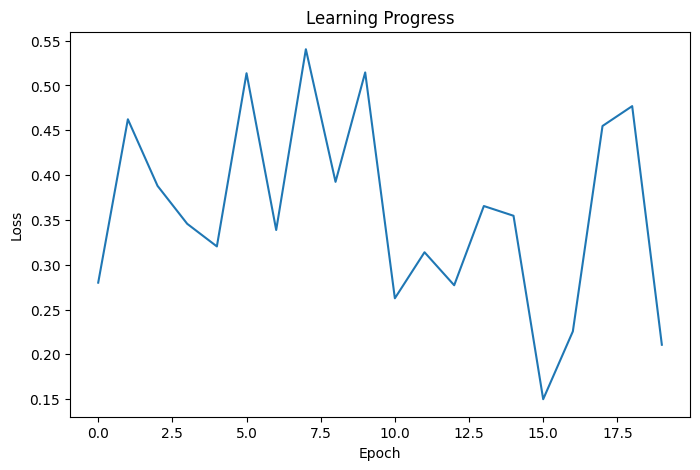

In [114]:
train(model, optimizer, mse, train_loader_named, 20, True)

In [115]:
class WideAndDeepV4(nn.Module):
  def __init__(self, n_features):
    super().__init__()
    self.deep_stack = nn.Sequential(
        nn.Linear(6, 50), nn.ReLU(),
        nn.Linear(50, 40), nn.ReLU()
    )

    self.output_layer = nn.Linear(40 + 5 , 1)
    self.aux_output_layer = nn.Linear(40, 1)

  def forward(self, X_wide, X_deep):
    deep_output = self.deep_stack(X_deep)
    concat = torch.concat([X_wide, deep_output], dim = 1)
    main_output = self.output_layer(concat)
    aux_output = self.aux_output_layer(deep_output)

    return main_output, aux_output

In [116]:
model = WideAndDeepV4(n_features)

In [117]:
model

WideAndDeepV4(
  (deep_stack): Sequential(
    (0): Linear(in_features=6, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=40, bias=True)
    (3): ReLU()
  )
  (output_layer): Linear(in_features=45, out_features=1, bias=True)
  (aux_output_layer): Linear(in_features=40, out_features=1, bias=True)
)

In [118]:
!pip install torchviz graphviz

In [119]:
def train(model, optimizer, criterion, train_loader, n_epochs):
  for epoch in range(n_epochs):
    for inputs, y_batch in train_loader:
      y_pred, y_pred_aux = model(**inputs)
      main_loss = criterion(y_pred, y_batch)
      aux_loss = criterion(y_pred_aux, y_batch)
      loss = 0.8 * main_loss + 0.2 * aux_loss

      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    print(f'Epoch {epoch + 1}/{n_epochs}, Loss: {loss}')

In [120]:
train(model, optimizer, mse, train_loader_named, n_epochs)

Epoch 1/20, Loss: 5.2309250831604
Epoch 2/20, Loss: 6.319655418395996
Epoch 3/20, Loss: 4.9219970703125
Epoch 4/20, Loss: 5.160385608673096
Epoch 5/20, Loss: 3.0533828735351562
Epoch 6/20, Loss: 5.387127876281738
Epoch 7/20, Loss: 3.3046622276306152
Epoch 8/20, Loss: 4.746399879455566
Epoch 9/20, Loss: 8.083887100219727
Epoch 10/20, Loss: 5.413763523101807
Epoch 11/20, Loss: 4.588622093200684
Epoch 12/20, Loss: 4.0329365730285645
Epoch 13/20, Loss: 4.666726112365723
Epoch 14/20, Loss: 6.336923599243164
Epoch 15/20, Loss: 4.170987129211426
Epoch 16/20, Loss: 6.247049331665039
Epoch 17/20, Loss: 6.157130718231201
Epoch 18/20, Loss: 8.343331336975098
Epoch 19/20, Loss: 5.1733479499816895
Epoch 20/20, Loss: 7.792996883392334


In [121]:
X_wide_graph = [i for i in train_loader_named][:1][0][0]['X_wide']
X_deep_graph = [i for i in train_loader_named][:1][0][0]['X_deep']

In [122]:
import torch
from torchviz import make_dot
import torchvision.models as models


In [123]:
model.eval()

batch_size = 1
X_wide = torch.zeros(batch_size , 5)
X_deep = torch.zeros(batch_size, 6)

y_pred, y_aux = model(X_wide, X_deep)

dot = make_dot(
    (y_pred + y_aux).sum(),
    params= dict(model.named_parameters())
)

dot.format = "png"
dot.render("wide_and_deep_graph")

'wide_and_deep_graph.png'

#Let's do some vision

In [124]:
import torchvision
import torchvision.transforms.v2 as T

In [125]:
toTensor = T.Compose([T.ToImage(), T.ToDtype(torch.float32, scale = True)])

In [126]:
train_and_valid_data = torchvision.datasets.FashionMNIST(
    root = 'datasets', train=True, download=True, transform = toTensor)
test_data = torchvision.datasets.FashionMNIST(
    root = 'datasets', train=False, download=True, transform = toTensor)

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.8MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 203kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.84MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 24.5MB/s]


In [127]:
torch.manual_seed(42)

In [128]:
train_data, valid_data = torch.utils.data.random_split(train_and_valid_data, [55_000, 5_000])

In [129]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

In [130]:
X_sample, y_sample = train_data[0]

In [131]:
X_sample.shape

torch.Size([1, 28, 28])

In [132]:
X_sample.dtype

torch.float32

In [133]:
train_and_valid_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [134]:
class ImageClassifier(nn.Module):
  def __init__(self, n_inputs, n_hidden1, n_hidden2, n_classes):
    super().__init__()
    self.mlp = nn.Sequential(
        nn.Flatten(),
        nn.Linear(n_inputs, n_hidden1),
        nn.ReLU(),
        nn.Linear(n_hidden1, n_hidden2),
        nn.ReLU(),
        nn.Linear(n_hidden2, n_classes),

    )

  def forward(self, X):
    return self.mlp(X)

In [135]:
torch.manual_seed(42)

In [136]:
model = ImageClassifier(n_inputs=28*28, n_hidden1 = 300, n_hidden2 = 100, n_classes = 10)
model = model.to(device)
xentropy = nn.CrossEntropyLoss()

In [137]:
def train(model, optimizer, criterion, train_loader, n_epochs):
  for epoch in range(n_epochs):
    for X_batch, y_batch in train_loader:
      X_batch, y_batch =X_batch.to(device), y_batch.to(device)
      y_pred = model(X_batch)
      loss = criterion(y_pred, y_batch)
      optimizer.step()
      optimizer.zero_grad()

    print(f'Epoch {epoch + 1}/{n_epochs}, Loss: {loss}')

In [138]:
optimizer = torch.optim.Adam(params = model.parameters(), lr = 0.002)

In [139]:
train(model, optimizer, xentropy, train_loader, 20)

In [140]:
accuracy = torchmetrics.Accuracy(task = 'multiclass', num_classes = 10).to(device)

In [141]:
model.eval()

ImageClassifier(
  (mlp): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=300, bias=True)
    (2): ReLU()
    (3): Linear(in_features=300, out_features=100, bias=True)
    (4): ReLU()
    (5): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [142]:
X_new, y_new = next(iter(valid_loader))
X_new = X_new[:3].to(device)

with torch.no_grad():
  y_pred_logits = model(X_new)

y_pred = y_pred_logits.argmax(dim=1)
y_pred

tensor([5, 5, 5], device='cuda:0')

In [143]:
[train_and_valid_data.classes[index] for index in y_pred]

['Sandal', 'Sandal', 'Sandal']

In [144]:
X_new.shape

torch.Size([3, 1, 28, 28])

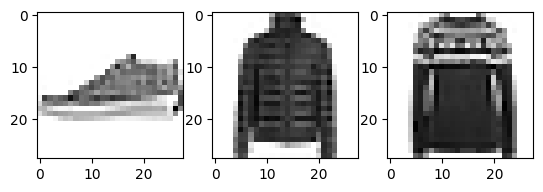

In [145]:
for i in range(X_new.shape[0]):
  plt.subplot(1, 3, i +1)
  plt.imshow(X_new[i, 0, :, :].cpu().numpy(), cmap='binary')

In [146]:
import torch.nn.functional as F

In [147]:
y_proba = F.softmax(y_pred_logits, dim=1)
y_proba.round(decimals= 3)

tensor([[0.1040, 0.1010, 0.0960, 0.0950, 0.1010, 0.1060, 0.1010, 0.0930, 0.0990,
         0.1030],
        [0.1020, 0.1000, 0.0990, 0.0970, 0.0930, 0.1150, 0.1000, 0.0960, 0.1000,
         0.0970],
        [0.1010, 0.1040, 0.0990, 0.0920, 0.0940, 0.1160, 0.0970, 0.0970, 0.1010,
         0.0990]], device='cuda:0')

In [148]:
y_top4_logits, y_top4_indices = torch.topk(y_pred_logits, 4 , dim = 1)
y_top4_probas = F.softmax(y_top4_logits, dim = 1)
y_top4_probas.round(decimals=3)

tensor([[0.2550, 0.2510, 0.2490, 0.2440],
        [0.2750, 0.2450, 0.2400, 0.2400],
        [0.2740, 0.2470, 0.2400, 0.2390]], device='cuda:0')

In [149]:
y_top4_indices

tensor([[5, 0, 9, 1],
        [5, 0, 1, 6],
        [5, 1, 0, 8]], device='cuda:0')

#Optimizing Models

In [150]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.9/413.9 kB 13.6 MB/s eta 0:00:00


In [151]:
import optuna

In [152]:
def train2(model, optimizer, criterion, metric, train_loader, valid_loader,
               n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for X_batch, y_batch in train_loader:
            model.train()
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_tm(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

In [153]:
import optuna
def objective(trial):
  learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
  n_hidden = trial.suggest_int("n_hidden", 20 , 300)
  model = ImageClassifier(n_inputs = 1 * 28 * 28, n_hidden1 = n_hidden, n_hidden2 = n_hidden, n_classes = 10).to(device)
  optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
  xentropy = nn.CrossEntropyLoss()
  accuracy = torchmetrics.Accuracy(task="multiclass", num_classes= 10)
  accuracy = accuracy.to(device)
  history = train2(model, optimizer, xentropy, accuracy, train_loader, valid_loader, n_epochs = 10)
  validation_accuracy = max(history["valid_metrics"])
  return validation_accuracy

In [154]:
torch.manual_seed(42)
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=5)

In [178]:
study.best_params

In [178]:
study.best_value

In [157]:
def objective(trial, train_loader, valid_loader):
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    n_hidden = trial.suggest_int("n_hidden", 20, 300)
    model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=n_hidden,
                            n_hidden2=n_hidden, n_classes=10).to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    xentropy = nn.CrossEntropyLoss()
    accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10)
    accuracy = accuracy.to(device)
    best_validation_accuracy = 0.0
    for epoch in range(n_epochs):
        history = train2(model, optimizer, xentropy, accuracy, train_loader,
                         valid_loader, n_epochs=1)
        validation_accuracy = max(history["valid_metrics"])
        if validation_accuracy > best_validation_accuracy:
            best_validation_accuracy = validation_accuracy
        trial.report(validation_accuracy, epoch)
        if trial.should_prune():
            raise optuna.TrialPruned()
    return best_validation_accuracy


In [158]:
objective_with_data = lambda trial: objective(
    trial, train_loader = train_loader, valid_loader = valid_loader)

In [159]:
from functools import partial
objective_with_data = partial(objective, train_loader=train_loader,
                              valid_loader=valid_loader)

In [160]:
torch.manual_seed(42)
sampler = optuna.samplers.TPESampler(seed=42)
pruner = optuna.pruners.MedianPruner()
study = optuna.create_study(direction="maximize", sampler=sampler,
                            pruner=pruner)
study.optimize(objective_with_data, n_trials=20)

In [178]:
study.best_value

In [178]:
study.best_params

In [163]:
torch.save(model, "my_fashion_mnist.pt")

In [164]:
loaded_model = torch.load("my_fashion_mnist.pt", weights_only=False)
loaded_model.eval()

ImageClassifier(
  (mlp): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=300, bias=True)
    (2): ReLU()
    (3): Linear(in_features=300, out_features=100, bias=True)
    (4): ReLU()
    (5): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [165]:
y_pred_logits = loaded_model(X_new)

In [166]:
torch.save(model.state_dict(), "my_fashion_mnist_weights.pt")

In [167]:
type(model.state_dict())

collections.OrderedDict

In [168]:
new_model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=300, n_hidden2=100,
                            n_classes=10)
loaded_weights = torch.load("my_fashion_mnist_weights.pt", weights_only=True)
new_model.load_state_dict(loaded_weights)
new_model.eval()

ImageClassifier(
  (mlp): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=300, bias=True)
    (2): ReLU()
    (3): Linear(in_features=300, out_features=100, bias=True)
    (4): ReLU()
    (5): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [169]:
model_data = {
    "model_state_dict": model.state_dict(),
    "model_hyperparameters": {
        "n_inputs": 1 * 28 * 28,
        "n_hidden1": 300,
        "n_hidden2": 100,
        "n_classes": 10,
    }
}
torch.save(model_data, "my_fashion_mnist_model.pt")

In [170]:
loaded_data = torch.load("my_fashion_mnist_model.pt", weights_only=True)
new_model = ImageClassifier(**loaded_data["model_hyperparameters"])
new_model.load_state_dict(loaded_data["model_state_dict"])
new_model.eval()

ImageClassifier(
  (mlp): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=300, bias=True)
    (2): ReLU()
    (3): Linear(in_features=300, out_features=100, bias=True)
    (4): ReLU()
    (5): Linear(in_features=100, out_features=10, bias=True)
  )
)

#Compile And Optimize the model

In [171]:
torchscript_model = torch.jit.trace(model, X_new)

In [172]:
torchscript_model = torch.jit.script(model)

In [173]:
optimized_model = torch.jit.optimize_for_inference(torchscript_model)

In [174]:
optimized_model.save("my_fashion_mnist_torchscript.pt")

In [175]:
loaded_torchscript_model = torch.jit.load("my_fashion_mnist_torchscript.pt")

In [176]:
y_pred_logits = loaded_torchscript_model(X_new)
y_pred_logits

tensor([[ 0.0652,  0.0380, -0.0122, -0.0232,  0.0297,  0.0806,  0.0308, -0.0485,
          0.0107,  0.0576],
        [ 0.0465,  0.0283,  0.0113, -0.0102, -0.0434,  0.1644,  0.0259, -0.0159,
          0.0255, -0.0020],
        [ 0.0480,  0.0739,  0.0270, -0.0492, -0.0292,  0.1788,  0.0088,  0.0017,
          0.0444,  0.0216]], device='cuda:0')

In [177]:
compiled_model = torch.compile(model)

In [178]:
if device == "cuda":
    y_pred_logits = compiled_model(X_new)

/usr/local/lib/python3.12/dist-packages/torch/backends/cuda/__init__.py:131: UserWarning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_precision = 'ieee'. Old settings, e.g, torch.backends.cuda.matmul.allow_tf32 = True, torch.backends.cudnn.allow_tf32 = True, allowTF32CuDNN() and allowTF32CuBLAS() will be deprecated after Pytorch 2.9. Please see https://pytorch.org/docs/main/notes/cuda.html#tensorfloat-32-tf32-on-ampere-and-later-devices (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:80.)
  return torch._C._get_cublas_allow_tf32()
W0212 15:28:53.218000 1085 torch/_inductor/utils.py:1558] [0/0] Not enough SMs to use max_autotune_gemm mode
